# Project details:

* This project aims to build a machine learning model capable of accurately identifying fraudulent credit card transactions based on historical data. By examining transaction patterns, the model will differentiate between legitimate and fraudulent activities, enabling financial institutions to detect suspicious behavior early and minimize potential risks.

## Step 1: Import librairies
* ***numpy*** for maths operations
* ***pandas*** for data manipulation
* ***matplotlib*** and seaborn for data visualisation
* ***scikit-learn*** for model building

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## Step 2: Loading and exploring the dataset 
here we use a dataset from kaggle : "/kaggle/input/creditcardfraud/creditcard.csv"

In [3]:
df = pd.read_csv('/Users/apple/Downloads/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Step 3: Analysing class distribution
* here we check the distribution of fraudulent and valid transaction
The simple way of doing this to calculate the ratio of fraud cases to valid cases to measure how imbalanced the dataset is.

Fraud Cases: 492
Valid Cases: 284315
Outlier Fraction: 0.0017


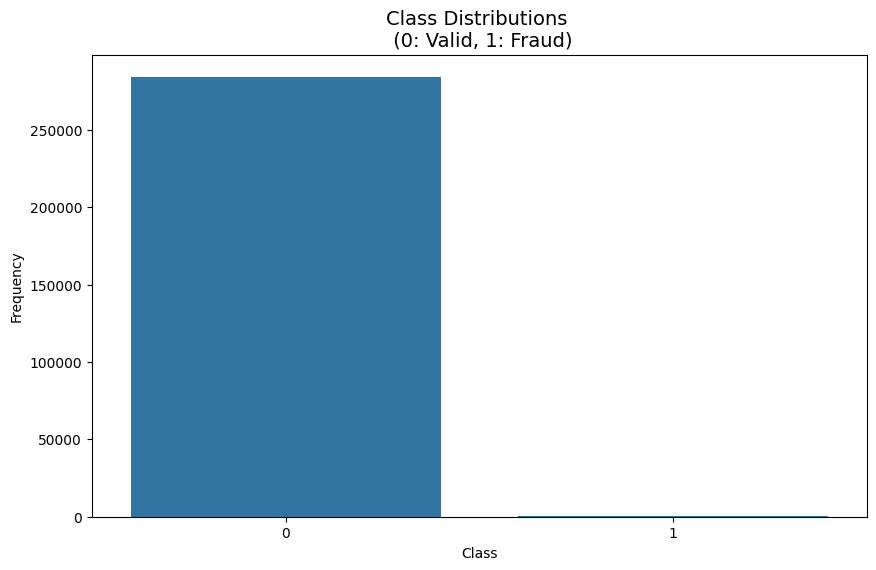

In [6]:
valid = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
outlier_fraction = len(fraud)/ float(len(valid))
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
print('Outlier Fraction: {:.4f}'.format(outlier_fraction))
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: Valid, 1: Fraud)', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Exploring the amount of transactions
here we will plot the distribution of the transaction amounts for both valid and fraudulent transactions

In [7]:
print('Amount details of valid transactions')
valid.Amount.describe()

Amount details of valid transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
print('Amount details of fraud transactions')
fraud.Amount.describe()

Amount details of fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Step 4: Correlation matrix
* Te correlation matrix give us an understanding of how the different features are correlated and which ones may be more relevant for prediction.

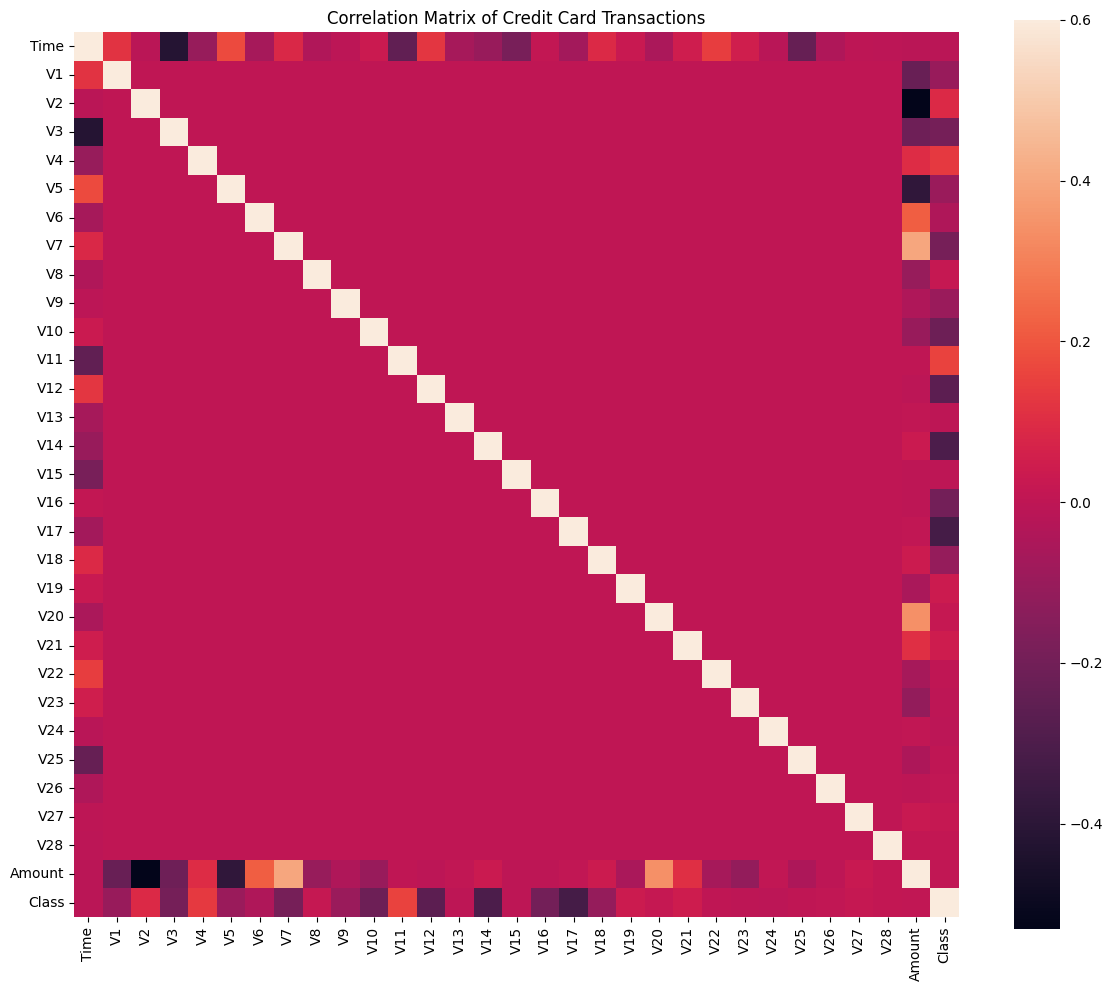

In [9]:
# plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmax= .6, square=True)
plt.title('Correlation Matrix of Credit Card Transactions')
plt.tight_layout()

# Step 6: Data preparation
here we separate the input features (X) and target variable (Y) then split the data into training and testing sets

In [10]:
# Data preparation
X = df.drop(['Class'], axis=1)
Y = df['Class']
print(X.shape, Y.shape)

(284807, 30) (284807,)


In [11]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=42)

# Step 7: Building and training the model
because this is a classification problem, we train a Random Forest Classifier to predict fraudulent transactions. 

In [12]:
# Building the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
# Making predictions
Y_pred = rf.predict(X_test)

# Step : Evaluation of the model
Here in this step, we evaluate the performance of the models by using various metrics such as accuracy, precision, recall, F1-score, and the Matthews correlation coefficient.

Accuracy: 0.9996
Precision: 0.9478
Recall: 0.8015
F1 Score: 0.8685
Matthews Correlation Coefficient: 0.8714


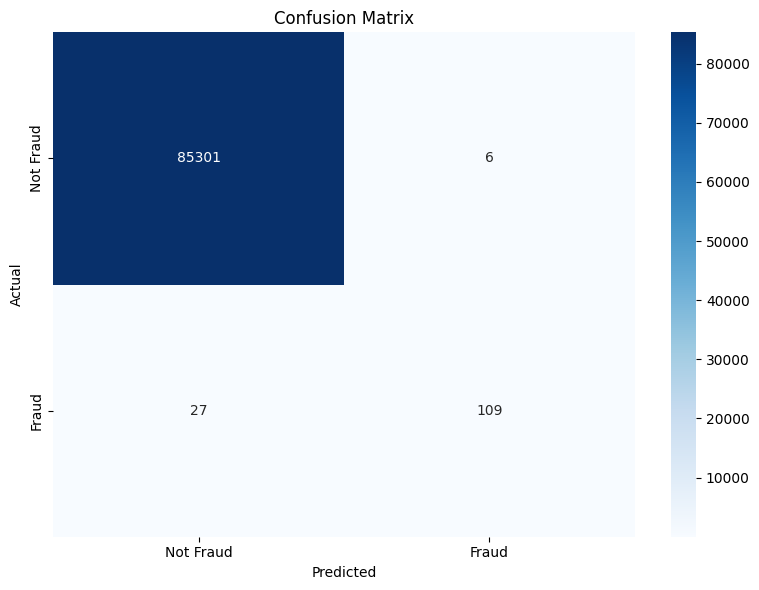

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
# Evaluating the model
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
mcc = matthews_corrcoef(Y_test, Y_pred)
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}') 
print(f'F1 Score: {f1:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Model Evaluation Metrics:
The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

* Accuracy: 0.9996: Out of all predictions, 99.96% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.

* Precision: 0.9478: When the model predicted "fraud", it was correct 98.73% of the time. High precision means very few false alarms (false positives).

* Recall: 0.7959: Out of all actual fraud cases, the model detected 79.59%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).

* F1-Score: 0.8814: A balance between precision and recall. 88.14% is strong and shows the model handles both catching fraud and avoiding false alarms well.

* Matthews Correlation Coefficient (MCC): 0.8863: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.8863 is very good, it means the model is making strong, balanced predictions overall.

# Step 8: Model deployment

In [15]:
import joblib
# Save the model
joblib.dump(rf, 'credit_card_fraud_model.pkl')

['credit_card_fraud_model.pkl']

In [16]:
ls

credit_card_fraud.ipynb      credit_card_fraud_model.pkl
